In [71]:
#https://www.kaggle.com/sdelecourt/cnn-with-pytorch-for-mnist
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
from torchsummary import summary
import torch.utils.data
from torch.autograd import Variable
import numpy as np

In [3]:
from torchvision import datasets
import torchvision.transforms as transforms

In [4]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Set the parameters
num_workers = 0
batch_size = 20

In [6]:
# Converting the Images to tensors using Transforms
transform = transforms.ToTensor()

train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

In [7]:
# Loading the Data
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

In [8]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

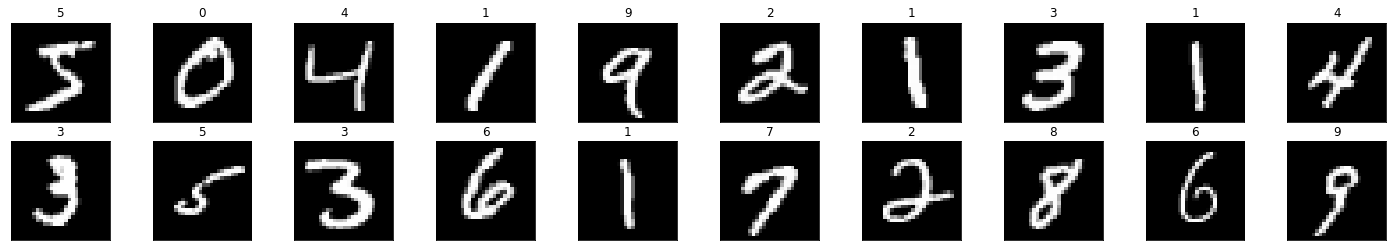

In [11]:
# Peeking into dataset
fig = plt.figure(figsize=(25, 4))
for image in np.arange(20):
    ax = fig.add_subplot(2, 20/2, image+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[image]), cmap='gray')
    ax.set_title(str(labels[image].item()))

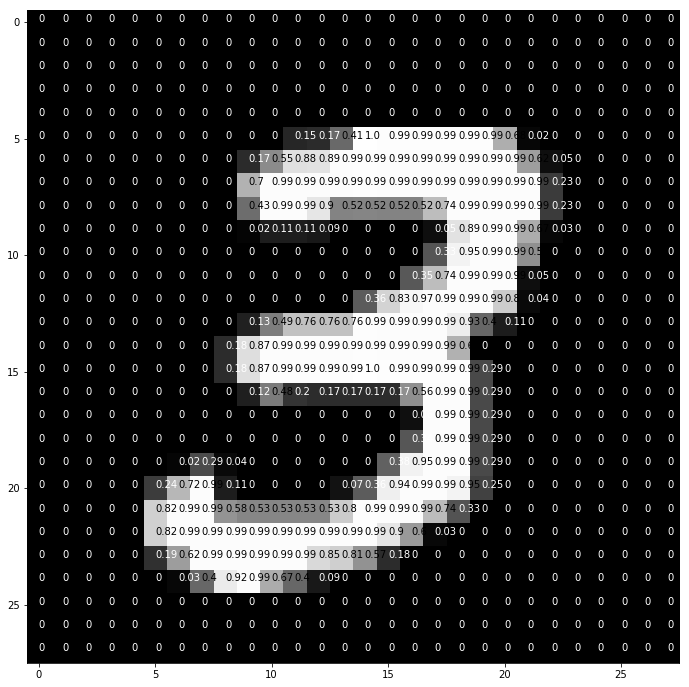

In [12]:
img = np.squeeze(images[7])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
            color='white' if img[x][y]<thresh else 'black')

In [41]:
img_path = 'C:/Users/Aleksandra/Pictures/image.jpg'
bgr_img = cv2.imread(img_path,1)

In [42]:
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

In [44]:
# Normalise
gray_img = gray_img.astype("float32")/255

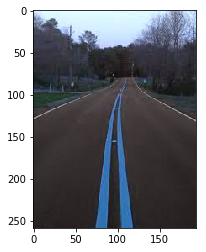

In [45]:
plt.imshow(bgr_img, cmap='gray')
plt.show()

In [46]:
#filters

In [47]:
filter_vals = np.array([
  [-1, -1, 1, 1],
  [-1, -1, 1, 1],
  [-1, -1, 1, 1],
  [-1, -1, 1, 1]
])

print('Filter shape: ', filter_vals.shape)

Filter shape:  (4, 4)


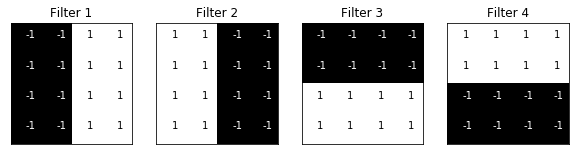

In [48]:
# Defining the Filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

# Check the Filters
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        color='white' if filters[i][x][y]<0 else 'black')

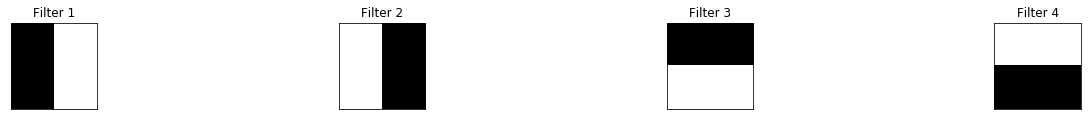

In [52]:
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1)
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))


In [53]:
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

In [ ]:
#viz_layer(conv)


In [78]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=5)
        self.conv3 = nn.Conv2d(32,64, kernel_size=5)
        self.fc1 = nn.Linear(3*3*64, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        #x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(F.max_pool2d(self.conv3(x),2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = x.view(-1,3*3*64 )
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
 
cnn = CNN()
print(cnn)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


In [79]:
it = iter(train_loader)
X_batch, y_batch = next(it)
print(cnn.forward(X_batch).shape)

torch.Size([20, 10])


In [80]:
fit(cnn,train_loader)

IndexError: invalid index of a 0-dim tensor. Use tensor.item() to convert a 0-dim tensor to a Python number

In [77]:
evaluate(cnn)

NameError: name 'evaluate' is not defined

In [68]:
inputs = torch.zeros((100, 1), dtype=torch.long) # [length, batch_size]
summary(model, inputs)

TypeError: forward() takes 2 positional arguments but 101 were given

In [72]:
def fit(model, train_loader):
    optimizer = torch.optim.Adam(model.parameters())#,lr=0.001, betas=(0.9,0.999))
    error = nn.CrossEntropyLoss()
    EPOCHS = 5
    model.train()
    for epoch in range(EPOCHS):
        correct = 0
        for batch_idx, (X_batch, y_batch) in enumerate(train_loader):
            var_X_batch = Variable(X_batch).float()
            var_y_batch = Variable(y_batch)
            optimizer.zero_grad()
            output = model(var_X_batch)
            loss = error(output, var_y_batch)
            loss.backward()
            optimizer.step()

            # Total correct predictions
            predicted = torch.max(output.data, 1)[1] 
            correct += (predicted == var_y_batch).sum()
            #print(correct)
            if batch_idx % 50 == 0:
                print('Epoch : {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Accuracy:{:.3f}%'.format(
                    epoch, batch_idx*len(X_batch), len(train_loader.dataset), 100.*batch_idx / len(train_loader), loss.data[0], float(correct*100) / float(BATCH_SIZE*(batch_idx+1))))
                

In [73]:
fit(model, train_loader)

AttributeError: 'tuple' object has no attribute 'log_softmax'

In [ ]:
def evaluate(model):
#model = mlp
    correct = 0 
    for test_imgs, test_labels in test_loader:
        #print(test_imgs.shape)
        test_imgs = Variable(test_imgs).float()
        output = model(test_imgs)
        predicted = torch.max(output,1)[1]
        correct += (predicted == test_labels).sum()
    print("Test accuracy:{:.3f}% ".format( float(correct) / (len(test_loader)*BATCH_SIZE)))
evaluate(model)